<a href="https://colab.research.google.com/github/ZViktoriya/VCR/blob/master/VKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение
Развитие современной техники требует новых конструкционных материалов, превосходящих по своим прочностным, упругим и другим свойствам традиционные. Композиционный материал – это искусственно созданный неоднородный сплошной материал, состоящий из двух и более композитов с четкой границей, раздела между ними. В большинстве композитов (за исключением слоистых) компоненты можно разделить на матрицу и включённые в нее элементы. 

Машинное обучение воспринимается как многообещающий инструмент для разработки и открытия новых материалов для широкого спектра приложений. Разработка новых материалов с превосходными индивидуальными свойствами является конечной целью современных инженерных приложений. За последние несколько десятилетий, благодаря быстрому развитию высокопроизводительных параллельных вычислений, материаловедения и численного моделирования, многие важные свойства материалов теперь могут быть рассчитаны с помощью моделирования с достаточной точностью. По сравнению с простым прогнозированием свойств известных материалов разработка новых материалов для достижения регулируемых свойств является более важной задачей для научных и инженерных целей. Эффективность и работоспособность материала зависят от правильного выбора исходных компонентов и технологии их совмещения, призванной обеспечить прочную связь между компонентами при сохранении их первоначальных характеристик. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).

 В последние годы искусственный интеллект развивается очень быстрыми темпами, даже сама технология нейронных сетей стала более доступной обычным пользователям. Также появилось множество технологий, использующих нейронные сети для ускорения или упрощения процессов. Машинное обучение являет собой самый простой вариант искусственного интеллекта. Оно предполагает, что с помощью различных методов на основе большого количества «тренировочных» данных можно классифицировать или
предсказать любой объект, явление или событие.


# 1. Анализ исходных данных и выбор методов решения

## 1.1 Постановка задачи

Предметом выпускной квалификационной работы являются построение моделей для прогнозирования таких характеристик композиционных материалов, как модуль упругости при растяжении, прочность при растяжении и создание нейронной сети для рекомендации соотношения матрица-наполнитель.

Для решения поставленной задачи потребуется:

1. описать методы, которые используются для решений;

2. провести разведочный анализ предложенных датасетов; 

* построить гистограммы распределения каждой из 
переменных;
* построить диаграммы ящиков с усами;

* построить попарные графики рассеяния точек;

* получить среднее и медианное значения;

* исключить выбросы, проверить отсутствие пропусков; 

3.  провести предобработку данных: удаление шумов, нормализацию;
4. обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении;

5. написать нейронную сеть, предназначенную для рекомендаций соотношения матрица-наполнитель;

6. оценить точность модели на тренировочном и тестовом датасете; 

7. разработать приложение с графическим интерфейсом, которое будет выдавать прогноз;

8. создать репозиторий в GitHub и разместить там код исследования.




## 1.2 Разведочный анализ данных

Для проведения разведочного анализа используется среда разработки Jupyter Notebook язык программирования Python и библиотеки Numpy, Pandas, Matplotlib, Seaborn и Sklearn.

Исходные данные о свойствах композиционных материалов получены структурным подразделением МГТУ им. Н.Э. Баумана – Центр НТИ «Цифровое материаловедение: новые материалы и вещества» и основан на реальных производственных задачах.

Данные состоит из двух файлов первый из которых – это файл X_bp.xlsx с данными о параметрах базальтопластика, а второй файл X_nup.xlsx с данными о нашивках из углепластика. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [ ]:
dataset_bp=pd.read_excel('/content/X_bp.xlsx')
dataset_bp.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
dataset_nup=pd.read_excel('/content/X_nup.xlsx')
dataset_nup.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.0,57.0
1,1.0,0.0,4.0,60.0
2,2.0,0.0,4.0,70.0
3,3.0,0.0,5.0,47.0
4,4.0,0.0,5.0,57.0


In [ ]:
dataset_bp.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1023.0,511.000000,295.458965,0.000000,255.500000,511.000000,766.500000,1022.000000
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732


In [ ]:
dataset_nup.describe()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1040.000000,1040.00000,1040.000000,1040.000000
mean,519.500000,45.00000,6.911385,57.248399
std,300.366443,45.02165,2.555181,12.332438
min,0.000000,0.00000,0.000000,0.000000
25%,259.750000,0.00000,5.102256,49.970740
50%,519.500000,45.00000,6.938000,57.413594
75%,779.250000,90.00000,8.587662,65.107235
max,1039.000000,90.00000,14.440522,103.988901


In [ ]:
dataset_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(11)
me

In [ ]:
dataset_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   float64
 1   Угол нашивки, град  1040 non-null   float64
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(4)
memory usage: 32.6 KB


Обьединим файлы X_bp.xlsx и X_nup.xlsx по индексу с типом объединения INNER.

In [ ]:
dataset=dataset_bp.merge(dataset_nup, how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
 11  Угол нашивки, гра

In [ ]:
dataset=dataset.drop(dataset.columns[0], axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [ ]:
dataset.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
dataset.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Оценка статистических характеристик данных с помощью метода dataset.describe().T

In [ ]:
dataset.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


## 1.3 Визуализация данных

### Корреляционная тепловая карта Пирсона

In [ ]:
fig = px.imshow(dataset.corr(), aspect="auto")
fig.show()

Из корреляционной тепловой карты Пирсона видно, что все коэффициенты корреляции близки к нулю. Это означает отсутствие линейной зависимости между признаками.

### Гистограммы распределения каждой из переменной и ящика с усами

In [ ]:
def AddDiagram(subplot, dataset, name, row, col):
    data_std   = np.std(dataset[name])
    data_mean = np.mean(dataset[name])
    data_median = np.median(dataset[name])
    anomaly_cut_off = data_std * 3

    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    subplot.add_trace(go.Box(x=dataset[name], line_color = 'blue', name=''),row=row, col=col)
    subplot.add_trace(go.Histogram(x=dataset[name], nbinsx=100, marker = dict(color='blue')),row=row+1, col=col)
    subplot.update_xaxes(title_text=name, row=row+1, col=col)
    subplot.update_xaxes(title_text=name, row=row, col=col)
    subplot.add_shape(type="line", xref='x', yref='y2 domain', x0=data_median, y0=0, x1=data_median, y1=0.9, line_dash="dash", line_color = 'firebrick',row=row+1, col=col)
    subplot.add_shape(type="line", xref='x', yref='y2 domain', x0=lower_limit, y0=0, x1=lower_limit, y1=0.9, line_dash="dash", line_color = 'firebrick',row=row+1, col=col)
    subplot.add_shape(type="line", xref='x', yref='y2 domain', x0=upper_limit, y0=0, x1=upper_limit, y1=0.9, line_dash="dash", line_color = 'firebrick',row=row+1, col=col)


In [ ]:
fig = make_subplots(rows=10, cols=3)

AddDiagram(fig, dataset,"Соотношение матрица-наполнитель", 1,1)
AddDiagram(fig, dataset,"Плотность, кг/м3", 1,2)
AddDiagram(fig, dataset,"модуль упругости, ГПа", 1,3)
AddDiagram(fig, dataset,"Количество отвердителя, м.%", 3,1)
AddDiagram(fig, dataset,"Содержание эпоксидных групп,%_2", 3,2)
AddDiagram(fig, dataset,"Температура вспышки, С_2", 3,3)
AddDiagram(fig, dataset,"Поверхностная плотность, г/м2", 5,1)
AddDiagram(fig, dataset,"Модуль упругости при растяжении, ГПа", 5,2)
AddDiagram(fig, dataset,"Прочность при растяжении, МПа", 5,3)
AddDiagram(fig, dataset,"Потребление смолы, г/м2", 7,1)
AddDiagram(fig, dataset,"Угол нашивки, град", 7,2)
AddDiagram(fig, dataset,"Шаг нашивки", 7,3)
AddDiagram(fig, dataset,"Плотность нашивки", 9,1)

fig.update_layout(showlegend=False,  height=2000)
fig.show()

Гистограммы распределения переменных показали, что все признаки, кроме «Угол нашивки», имеют нормальное распределение и принимают неотрицательные значения. «Угол нашивки» принимает два значения: 0, 90 градусов.

### Попарные графики рассеяния точек

<Figure size 1152x1152 with 0 Axes>

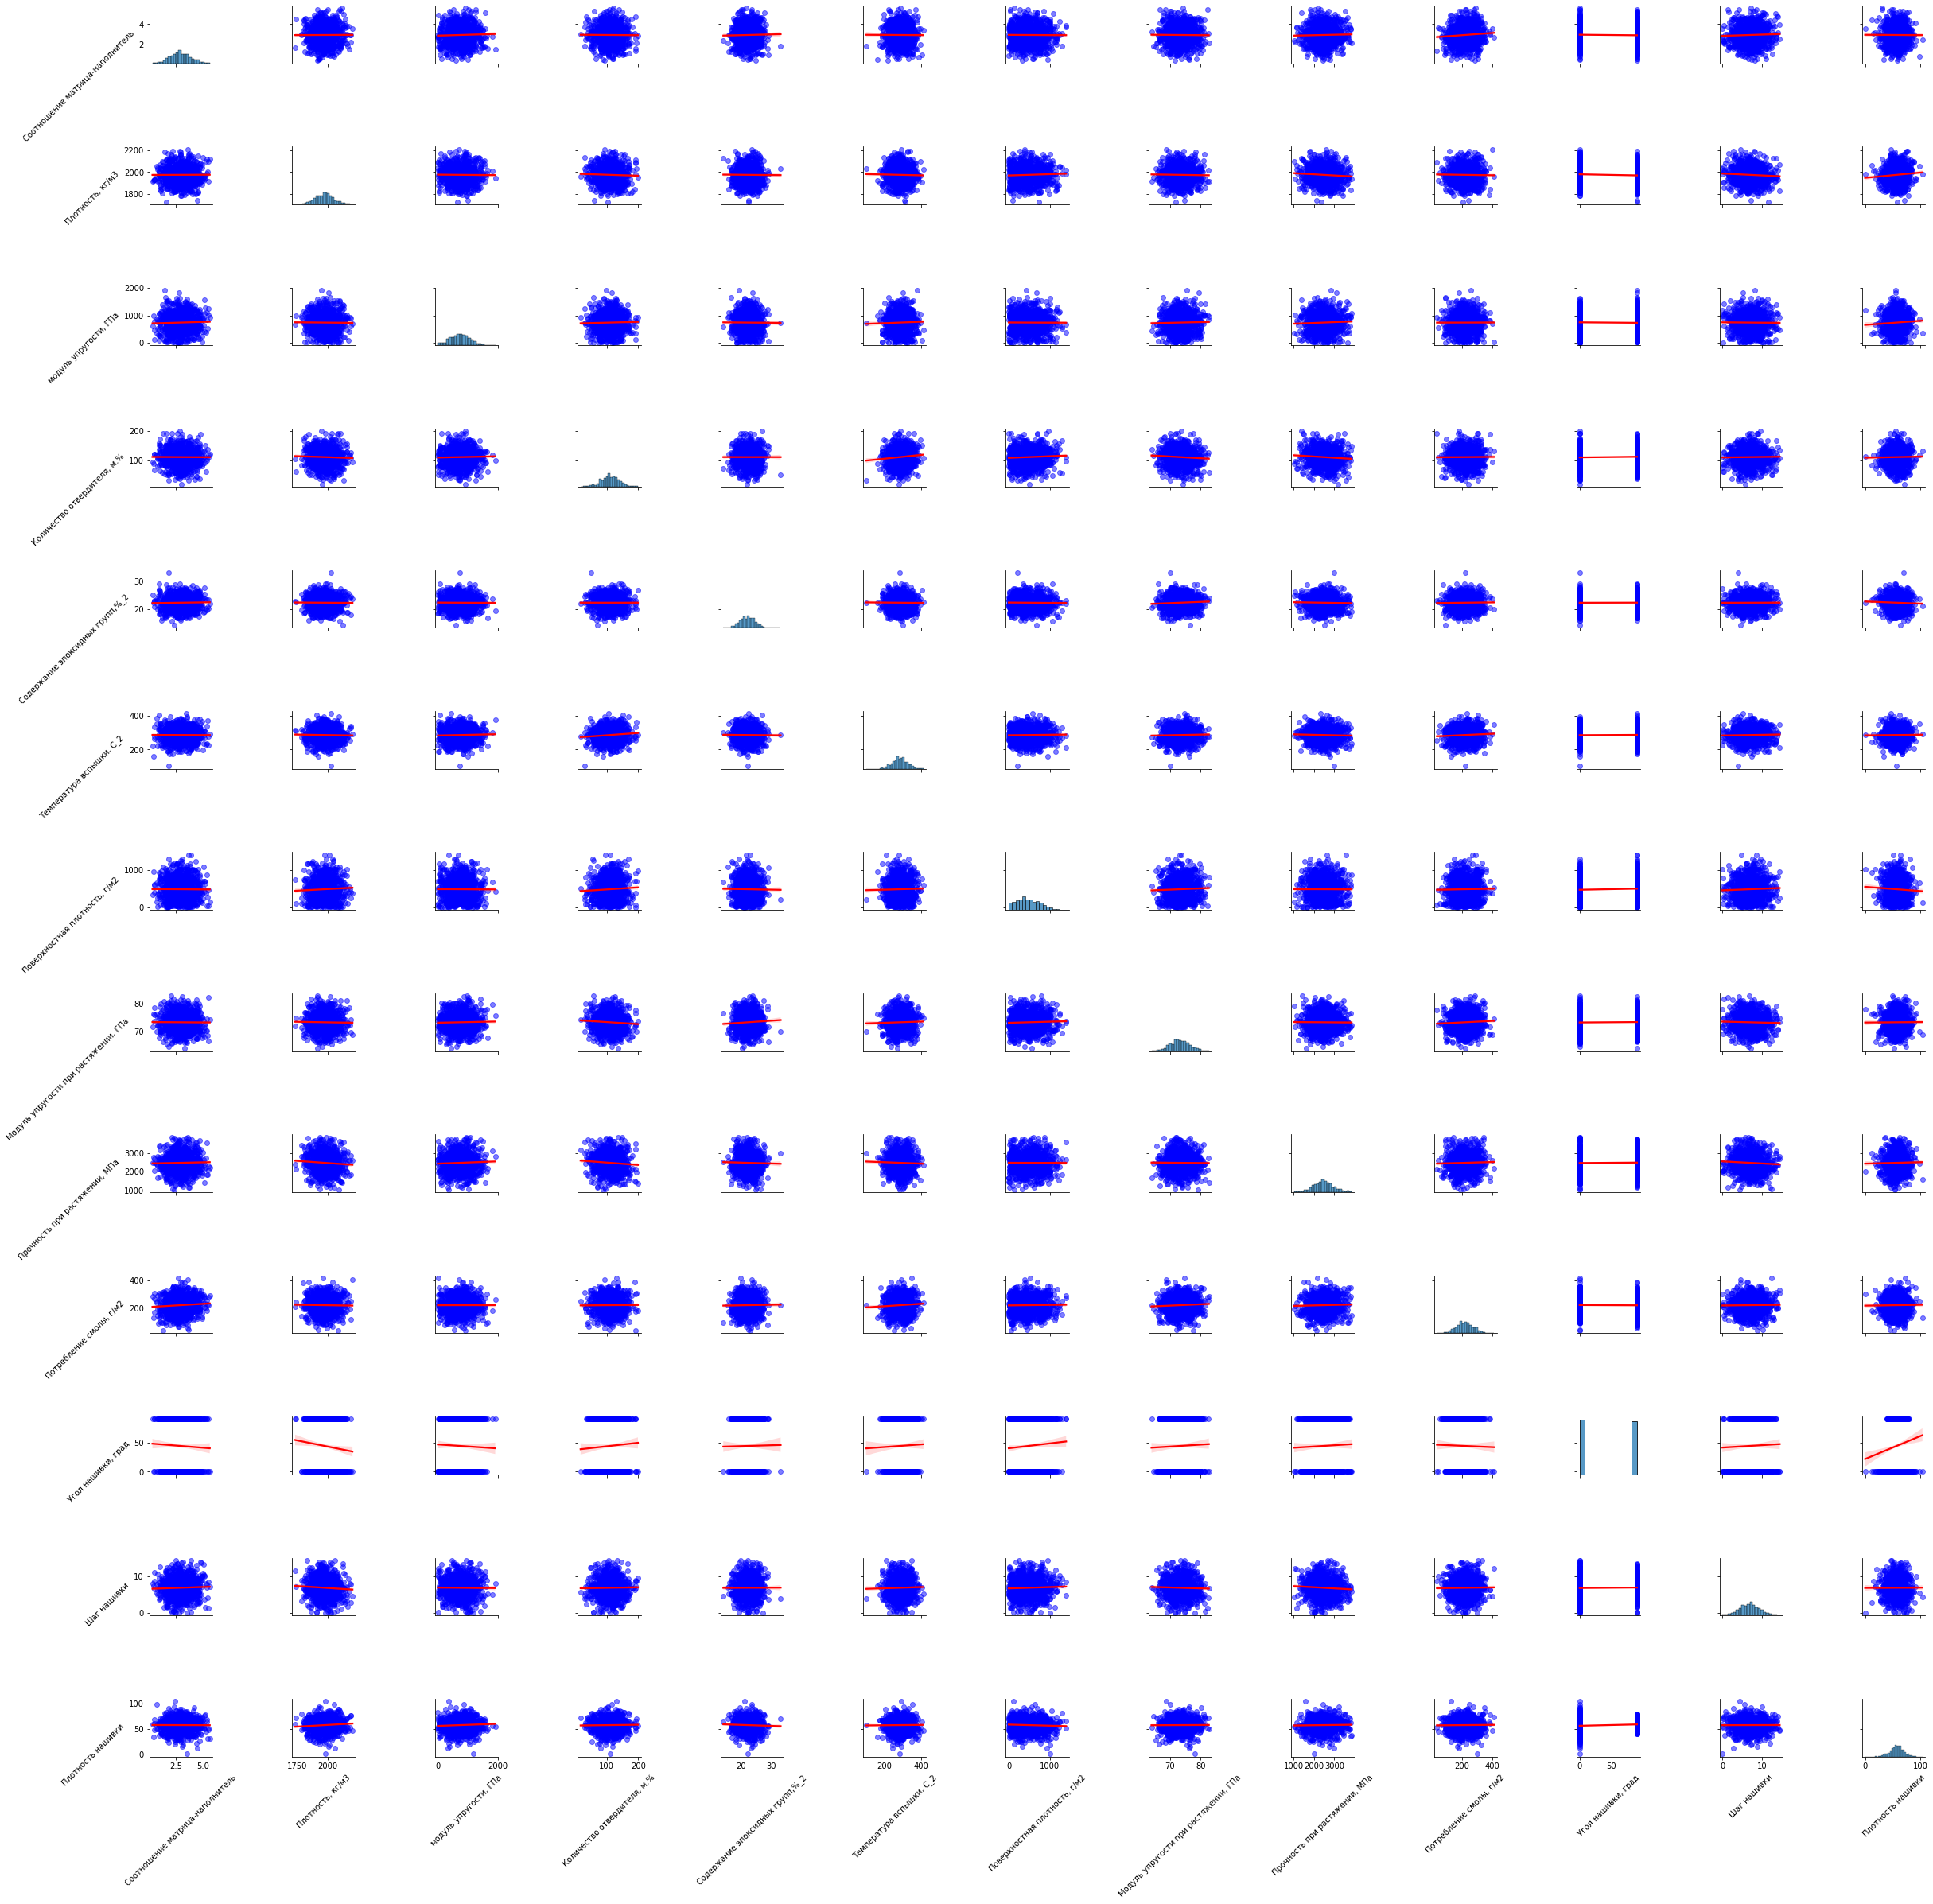

In [ ]:
plt.figure(figsize=(16, 16))
g = sns.pairplot(dataset, kind='reg',  diag_kind='hist', plot_kws={'line_kws': {'color': 'red'},
                                                                  'scatter_kws': {'alpha': 0.5,
                                                                                  'color': 'blue'}})
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.show()



По форме разброса точек, в виде облаков, становится понятно, что зависимости между переменными, на которых будет основываться работа модели, не обнаруживаются

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


# 2. Практическая часть

## 2.1 Предобработка данных

### Поиск и удаление выбросов методом 3х сигм

Для удаления выбросов используется метод 3х сигм так как при использовании этого метода исключается меньше полезной информации.

In [ ]:
def find_anomalies(data):
    # Устанавливаю верхний и нижний пределы на 3 стандартных отклонения
    data_std   = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print("random_data_std = ",data_std)
    print("random_data_mean = ",data_mean)
    print("lower_limit = ",lower_limit)
    print("upper_limit = ",upper_limit)
    for index, value in enumerate(data):
        if value > upper_limit or value < lower_limit:
            print("outlier = ",value)
            data[index]=np.nan

In [ ]:
for column in dataset:
  print(column)
  find_anomalies(dataset[column])


Соотношение матрица-наполнитель
random_data_std =  0.9127757819049906
random_data_mean =  2.9303657734325506
lower_limit =  0.1920384277175784
upper_limit =  5.668693119147523
Плотность, кг/м3
random_data_std =  73.69318594788827
random_data_mean =  1975.7348881101548
lower_limit =  1754.65533026649
upper_limit =  2196.81444595382
outlier =  2207.77348061119
outlier =  1740.65749569112
outlier =  1731.764635096
модуль упругости, ГПа
random_data_std =  330.07013758850314
random_data_mean =  739.9232327560719
lower_limit =  -250.28718000943752
upper_limit =  1730.1336455215815
outlier =  1911.53647700054
outlier =  1815.86516990736
Количество отвердителя, м.%
random_data_std =  28.282078038737552
random_data_mean =  110.57076864736258
lower_limit =  25.724534531149928
upper_limit =  195.41700276357523
outlier =  17.7402745562519
outlier =  198.953207190451
Содержание эпоксидных групп,%_2
random_data_std =  2.4051249036363265
random_data_mean =  22.24438954776772
lower_limit =  15.0290148

In [ ]:
dataset.isnull().sum().sum()

25

In [ ]:
dataset= dataset.dropna()


### Нормализация данных

После удаления выбросов, проведя анализ данных видно, что значения находятся в разных диапазонах. 

Для обучения моделей для прогноза модуля упругости при растяжении и прочности при растяжении необходимо данные нормализовать так как многие алгоритмы машинного обучения работают лучше, когда числовые входные переменные масштабируются до стандартного диапазона. 

Для масштабирования данных используется метод MinMaxScaler который масштабирует все функции данных в диапазоне [0, 1].

In [ ]:
min_max_scaler = MinMaxScaler()
dataset_norm = pd.DataFrame(min_max_scaler.fit_transform(dataset), columns = dataset.columns, index=dataset.index)

### Гистограммы распределения каждой из переменной и ящики с усами нормализованных данных

In [ ]:
fig = make_subplots(rows=10, cols=3)

AddDiagram(fig, dataset_norm,"Соотношение матрица-наполнитель", 1,1)
AddDiagram(fig, dataset_norm,"Плотность, кг/м3", 1,2)
AddDiagram(fig, dataset_norm,"модуль упругости, ГПа", 1,3)
AddDiagram(fig, dataset_norm,"Количество отвердителя, м.%", 3,1)
AddDiagram(fig, dataset_norm,"Содержание эпоксидных групп,%_2", 3,2)
AddDiagram(fig, dataset_norm,"Температура вспышки, С_2", 3,3)
AddDiagram(fig, dataset_norm,"Поверхностная плотность, г/м2", 5,1)
AddDiagram(fig, dataset_norm,"Модуль упругости при растяжении, ГПа", 5,2)
AddDiagram(fig, dataset_norm,"Прочность при растяжении, МПа", 5,3)
AddDiagram(fig, dataset_norm,"Потребление смолы, г/м2", 7,1)
AddDiagram(fig, dataset_norm,"Угол нашивки, град", 7,2)
AddDiagram(fig, dataset_norm,"Шаг нашивки", 7,3)
AddDiagram(fig, dataset_norm,"Плотность нашивки", 9,1)

fig.update_layout(showlegend=False,  height=2000)
fig.show()

### Попарные графики рассеяния точек нормализованных данных

<Figure size 1152x1152 with 0 Axes>

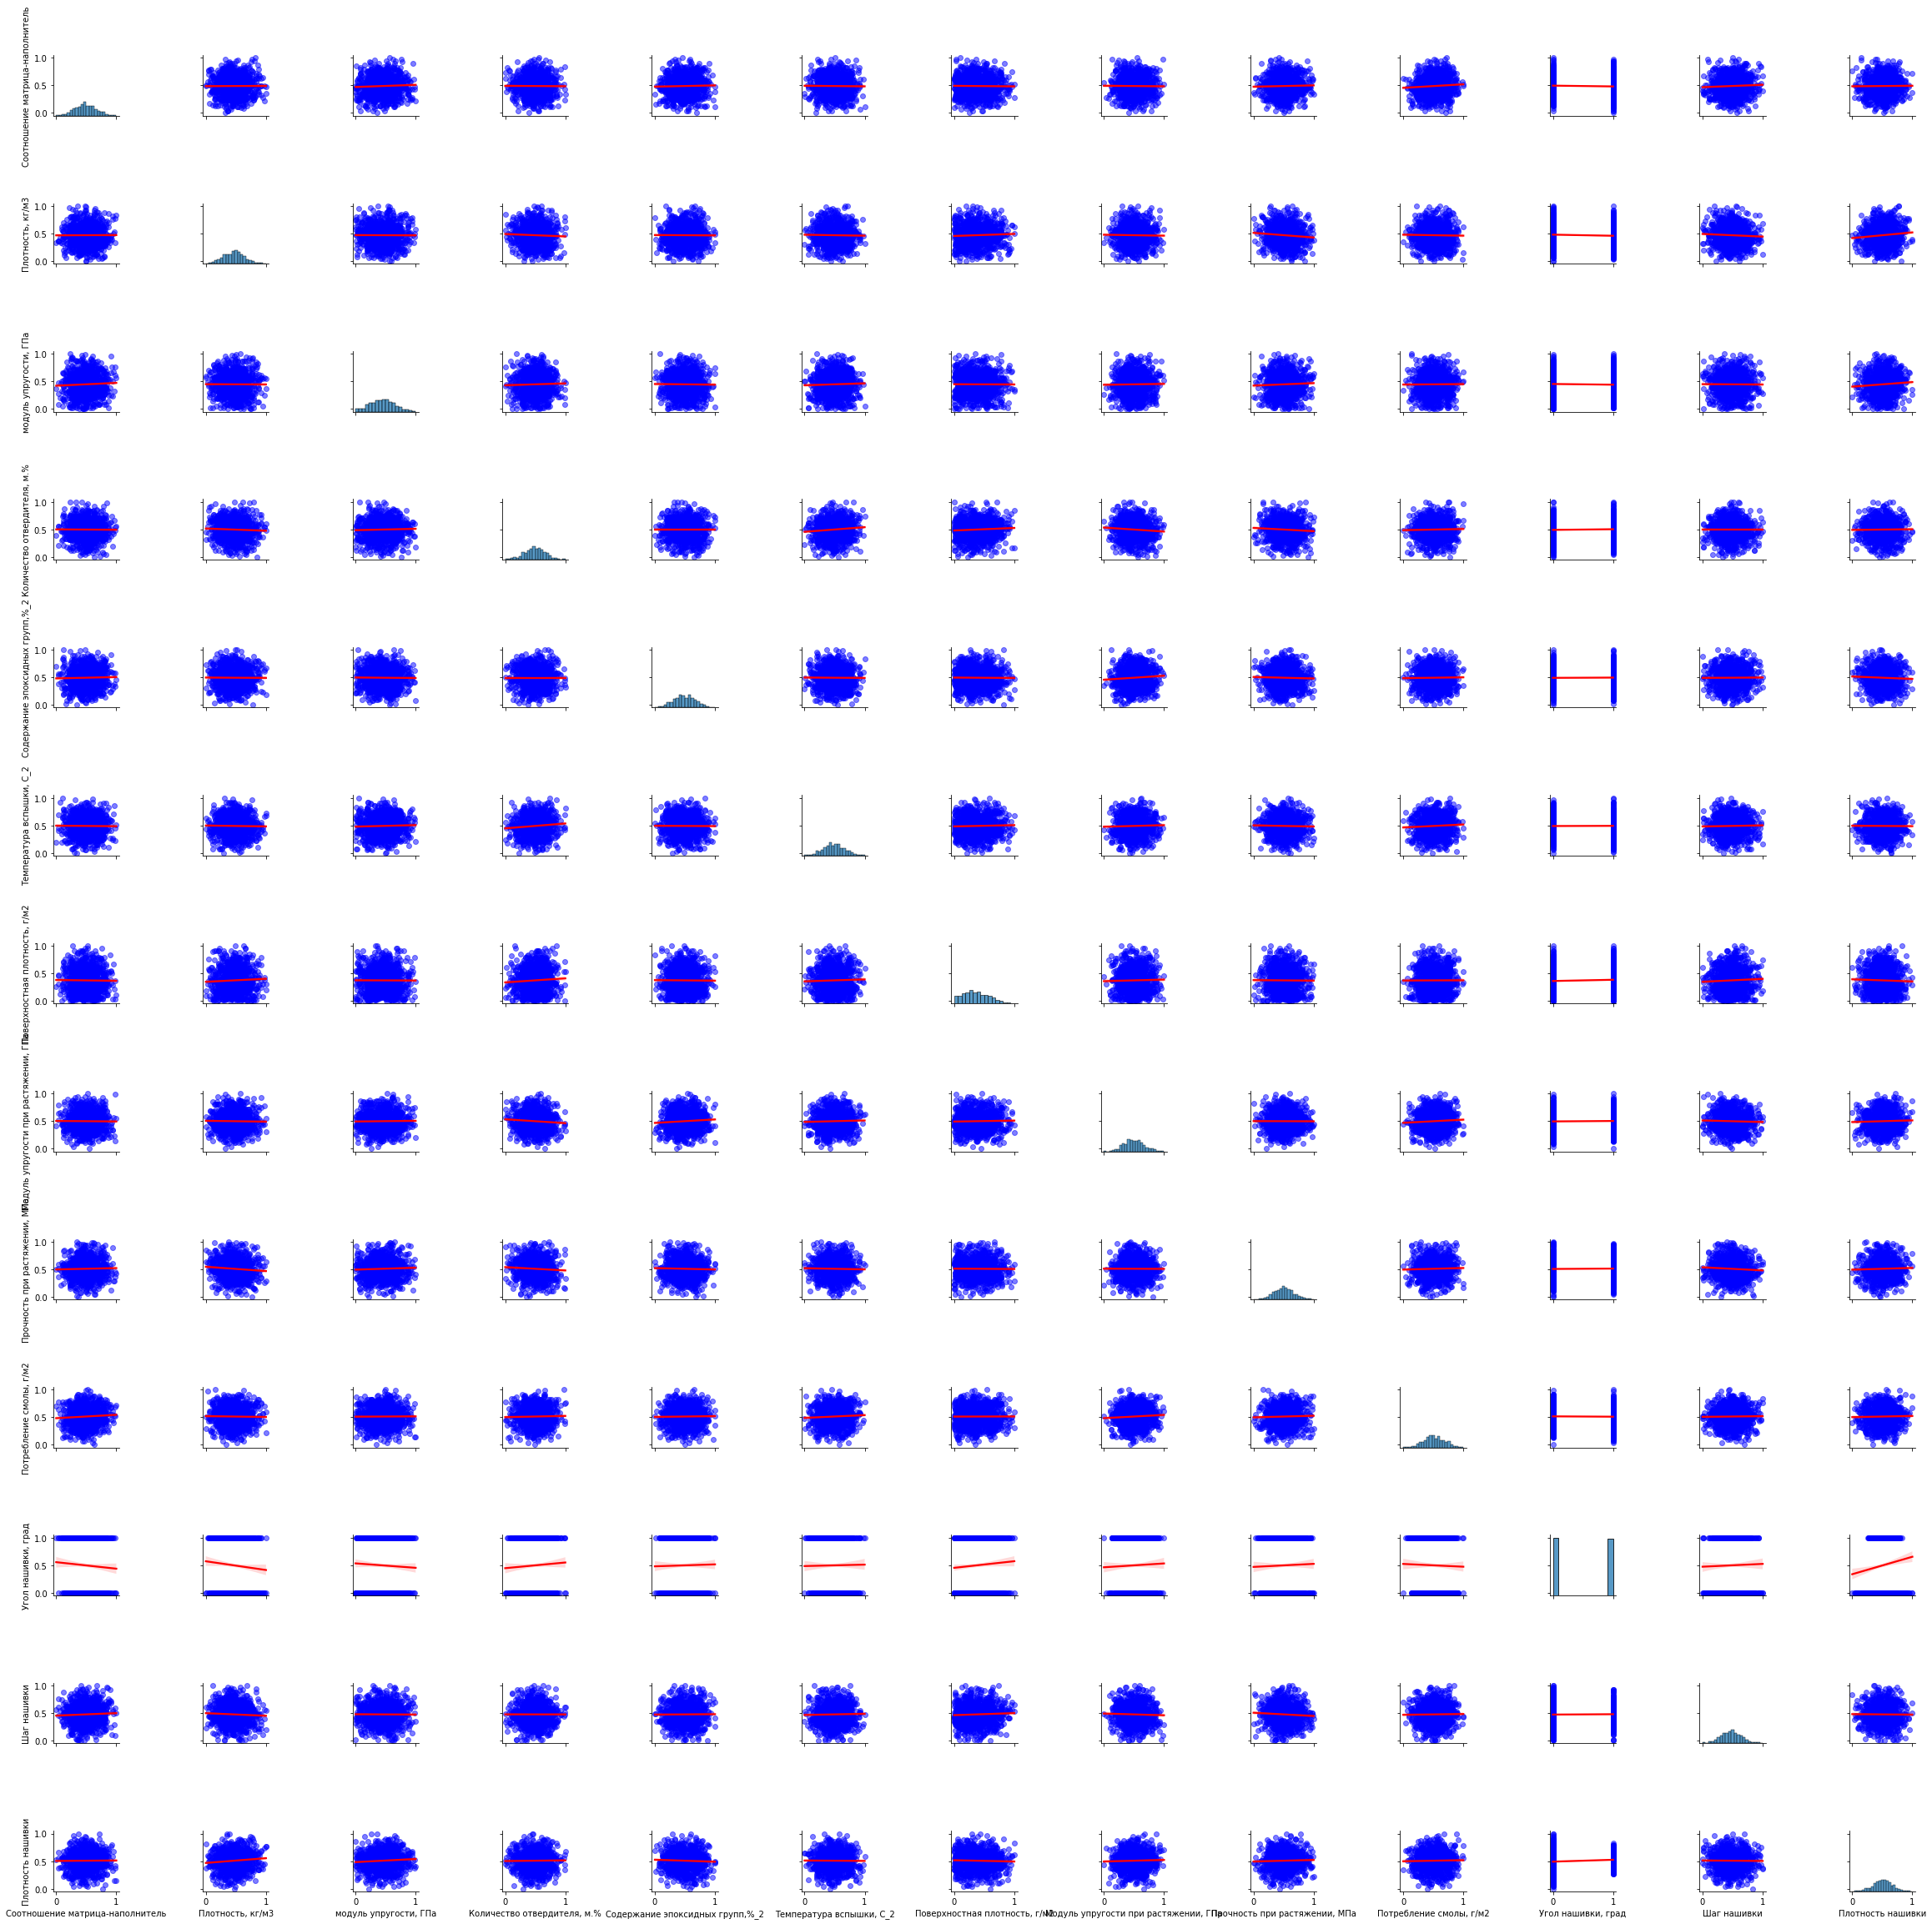

In [ ]:
plt.figure(figsize=(16, 16))
sns.pairplot(dataset_norm, kind='reg',diag_kind='hist', plot_kws={'line_kws': {'color': 'red'},
                                                                  'scatter_kws': {'alpha': 0.5,
                                                                                  'color': 'blue'}})
plt.show()

In [ ]:
dataset_norm.describe().T


,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,999.0,0.489727,0.174701,0.0,0.371306,0.484288,0.608487,1.0
"Плотность, кг/м3",999.0,0.467798,0.178722,0.0,0.341020,0.472391,0.579760,1.0
"модуль упругости, ГПа",999.0,0.446887,0.198929,0.0,0.302135,0.448458,0.581067,1.0
"Количество отвердителя, м.%",999.0,0.496747,0.170875,0.0,0.384427,0.495616,0.613450,1.0
"Содержание эпоксидных групп,%_2",999.0,0.493097,0.179869,0.0,0.368588,0.492051,0.624540,1.0
"Температура вспышки, С_2",999.0,0.488685,0.174877,0.0,0.371822,0.488391,0.606296,1.0
"Поверхностная плотность, г/м2",999.0,0.371058,0.215125,0.0,0.206249,0.348503,0.534748,1.0
"Модуль упругости при растяжении, ГПа",999.0,0.501023,0.167891,0.0,0.389296,0.496176,0.610020,1.0
"Прочность при растяжении, МПа",999.0,0.508273,0.172193,0.0,0.390683,0.504890,0.613078,1.0
"Потребление смолы, г/м2",999.0,0.512182,0.170414,0.0,0.401086,0.512933,0.625356,1.0


## 2.2 Разработка и обучение модели

### Импорт необходимых библиотек

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Деление выборки на обучающую и тестовую

In [ ]:
x_uprugost = dataset_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_prochnost = dataset_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_uprugost = dataset_norm[['Модуль упругости при растяжении, ГПа']]
y_prochnost = dataset_norm[['Прочность при растяжении, МПа']]

x_train_uprugost, x_test_uprugost, y_train_uprugost, y_test_uprugost = train_test_split(x_uprugost, y_uprugost, test_size=0.3, random_state=1)
x_train_prochnost, x_test_prochnost, y_train_prochnost, y_test_prochnost = train_test_split(x_prochnost, y_prochnost, test_size=0.3, random_state=1)

In [ ]:
print(x_train_uprugost.shape, x_test_uprugost.shape, y_train_uprugost.shape, y_test_uprugost.shape)
print(x_train_prochnost.shape, x_test_prochnost.shape, y_train_prochnost.shape, y_test_prochnost.shape)

(699, 12) (300, 12) (699, 1) (300, 1)
(699, 12) (300, 12) (699, 1) (300, 1)


## Создаем словарь c лучшими результатами по каждой модели

### Создание вспомогательных функций

In [ ]:
def GridSearchCVCouner(model, params, x_train, y_train):
  GSCV = GridSearchCV(model, params, n_jobs=-1, cv=10)  
  GSCV.fit(x_train, y_train)
  GSCV.best_params_
  print(f"Лучший параметр для {model}:")
  print(GSCV.best_params_)
  return GSCV

def ErrorCouner(model, GSCV, x_test, y_test, collumn):
  best_estimator = GSCV.best_estimator_
  result = pd.DataFrame({
     'Model': f'{model}', 
     'MAE': mean_absolute_error(y_test, best_estimator.predict(x_test)), 
     'MSE': mean_squared_error(y_test, best_estimator.predict(x_test)), 
     'R2 score': best_estimator.score(x_test, y_test)
  }, index=[collumn])
  print(result)
  return result


In [ ]:
models_uprugost = {}
models_prochnost = {}

### Линейная регрессия (LinearRegression)

LinearRegression соответствует линейной модели с коэффициентами w = (w1, …, wp), чтобы минимизировать остаточную сумму квадратов между наблюдаемыми целями в наборе данных и целями, предсказанными линейным приближением.

Линейная регрессия — первый тщательно изученный метод регрессионного анализа. Его главное достоинство — простота. Такую модель можно построить и рассчитать даже без мощных вычислительных средств. Простота является и главным недостатком этого метода. Тем не менее, именно с линейной регрессии целесообразно начать подбор подходящей модели.

In [ ]:
modell = LinearRegression()
params = { 'fit_intercept' : ['True', 'False']}
params

{'fit_intercept': ['True', 'False']}

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["LinearRegression"] = LinearRegression(**GSCV.best_params_)

Лучший параметр для LinearRegression():
{'fit_intercept': 'True'}
                                              Model       MAE       MSE  \
Модуль упругости при растяжении  LinearRegression()  0.131349  0.026459   

                                 R2 score  
Модуль упругости при растяжении -0.000444  
CPU times: user 133 ms, sys: 57.3 ms, total: 191 ms
Wall time: 1.54 s


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["LinearRegression"] = LinearRegression(**GSCV.best_params_)

Лучший параметр для LinearRegression():
{'fit_intercept': 'True'}
                                       Model       MAE       MSE  R2 score
Прочность при растяжении  LinearRegression()  0.141692  0.031605 -0.024685
CPU times: user 68.6 ms, sys: 1.04 ms, total: 69.7 ms
Wall time: 142 ms


### Ridge Regression

Ridge Regression (гребневая регрессия) очень похожа на регрессию LASSO в том, что она применяет сжатие. Оба алгоритма хорошо подходят для наборов данных с большим количеством признаков, которые не являются независимыми друг от друга (коллинеарность). Однако самое большое различие между ними в том, что гребневая регрессия использует регуляризацию L2, то есть ни один из коэффициентов не становится нулевым, как это происходит в регрессии LASSO. Вместо этого коэффициенты всё больше приближаются к нулю, но не имеют большого стимула достичь его из-за природы регуляризации L2.

In [ ]:
modell = Ridge()
params = {'alpha': np.arange(0.001, 0.1, 0.003),
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
params

{'alpha': array([0.001, 0.004, 0.007, 0.01 , 0.013, 0.016, 0.019, 0.022, 0.025,
        0.028, 0.031, 0.034, 0.037, 0.04 , 0.043, 0.046, 0.049, 0.052,
        0.055, 0.058, 0.061, 0.064, 0.067, 0.07 , 0.073, 0.076, 0.079,
        0.082, 0.085, 0.088, 0.091, 0.094, 0.097]),
 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["Ridge"] = Ridge(**GSCV.best_params_)

Лучший параметр для Ridge():
{'alpha': 0.097, 'solver': 'lsqr'}
                                   Model       MAE       MSE  R2 score
Модуль упругости при растяжении  Ridge()  0.131314  0.026452 -0.000168
CPU times: user 2.02 s, sys: 36.2 ms, total: 2.06 s
Wall time: 8.76 s


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["Ridge"] = Ridge(**GSCV.best_params_)

Лучший параметр для Ridge():
{'alpha': 0.097, 'solver': 'sag'}
                            Model       MAE       MSE  R2 score
Прочность при растяжении  Ridge()  0.141665  0.031597 -0.024439
CPU times: user 1.65 s, sys: 14.1 ms, total: 1.67 s
Wall time: 8.23 s


### Lasso Regression

LassoRegressor - (LASSO, Least Absolute Shrinkage and Selection Operator) — это вариация линейной регрессии, специально адаптированная для данных, которые демонстрируют сильную мультиколлинеарность (то есть сильную корреляцию признаков друг с другом). Она автоматизирует части выбора модели, такие как выбор переменных или исключение параметров. LASSO использует сжатие коэффициентов (shrinkage), то есть процесс, в котором значения данных приближаются к центральной точке (например, среднему значению).

In [ ]:
modell = Lasso()
params = [{'alpha': np.arange(0.001,0.1,0.003)}]
params

[{'alpha': array([0.001, 0.004, 0.007, 0.01 , 0.013, 0.016, 0.019, 0.022, 0.025,
         0.028, 0.031, 0.034, 0.037, 0.04 , 0.043, 0.046, 0.049, 0.052,
         0.055, 0.058, 0.061, 0.064, 0.067, 0.07 , 0.073, 0.076, 0.079,
         0.082, 0.085, 0.088, 0.091, 0.094, 0.097])}]

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["Lasso"] = Lasso(**GSCV.best_params_)

Лучший параметр для Lasso():
{'alpha': 0.007}
                                   Model       MAE       MSE  R2 score
Модуль упругости при растяжении  Lasso()  0.130975  0.026454 -0.000254
CPU times: user 414 ms, sys: 7.01 ms, total: 422 ms
Wall time: 1.17 s


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["Lasso"] = Lasso(**GSCV.best_params_)

Лучший параметр для Lasso():
{'alpha': 0.001}
                            Model       MAE       MSE  R2 score
Прочность при растяжении  Lasso()  0.139954  0.031422 -0.018763
CPU times: user 414 ms, sys: 10.1 ms, total: 424 ms
Wall time: 1.2 s


### Стохастический градиентный спуск (SGDRegressor)

SGDRegressor - линейная модель подобрана путем минимизации регуляризованных эмпирических потерь с помощью SGD. SGD означает стохастический градиентный спуск: градиент потерь оценивается для каждой выборки за раз, и модель обновляется по пути с уменьшением графика силы (он же скорость обучения). Регуляризатор — это штраф, добавленный к функции потерь, который сжимает параметры модели до нулевого вектора, используя либо квадрат евклидовой нормы L2, либо абсолютную норму L1, либо их комбинацию (эластичная сеть). Если обновление параметра пересекает значение 0.0 из-за регуляризатора, обновление усекается до 0.0, чтобы можно было изучить разреженные модели и добиться выбора онлайн-функций. Эта реализация работает с данными, представленными в виде плотных массивов значений с плавающей запятой для функций.

In [ ]:
modell= SGDRegressor()
params = {'penalty' : ['elasticnet', 'l2', 'l1'], 
          'alpha' : np.arange(0.001, 0.1, 0.003),
          'learning_rate' : ['optimal', 'invscaling', 'adaptive']
          }
params

{'alpha': array([0.001, 0.004, 0.007, 0.01 , 0.013, 0.016, 0.019, 0.022, 0.025,
        0.028, 0.031, 0.034, 0.037, 0.04 , 0.043, 0.046, 0.049, 0.052,
        0.055, 0.058, 0.061, 0.064, 0.067, 0.07 , 0.073, 0.076, 0.079,
        0.082, 0.085, 0.088, 0.091, 0.094, 0.097]),
 'learning_rate': ['optimal', 'invscaling', 'adaptive'],
 'penalty': ['elasticnet', 'l2', 'l1']}

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["SGDRegressor"] = SGDRegressor(**GSCV.best_params_)

Лучший параметр для SGDRegressor():
{'alpha': 0.07, 'learning_rate': 'invscaling', 'penalty': 'l1'}
                                          Model       MAE      MSE  R2 score
Модуль упругости при растяжении  SGDRegressor()  0.130958  0.02645 -0.000113
CPU times: user 3.85 s, sys: 66.8 ms, total: 3.92 s
Wall time: 1min 1s


In [ ]:
%%time
SCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["SGDRegressor"] = SGDRegressor(**GSCV.best_params_)

Лучший параметр для SGDRegressor():
{'alpha': 0.046, 'learning_rate': 'invscaling', 'penalty': 'l1'}
                                   Model       MAE      MSE  R2 score
Прочность при растяжении  SGDRegressor()  0.137961  0.03089 -0.001503
CPU times: user 3.86 s, sys: 66.4 ms, total: 3.92 s
Wall time: 1min 1s


### BayesianRidge

BayesianRidge - регрессия байесовского гребня. Байесовская регрессия позволяет естественному механизму выжить при недостатке данных или плохо распределенных данных, формулируя линейную регрессию с использованием распределителей вероятностей, а не точечных оценок. Предполагается, что выход или ответ получен из распределения вероятностей, а не оценивается как одно значение. Математически для получения полностью вероятностной модели предполагается, что отклик y имеет распределение по Гауссу.

In [ ]:
modell = BayesianRidge()
params = {'alpha_1' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
          'alpha_2' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
          'lambda_1' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
          'lambda_2' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
          'compute_score': ['False', 'True'],
          'fit_intercept': ['False', 'True']
           }
params

{'alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
 'alpha_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
 'compute_score': ['False', 'True'],
 'fit_intercept': ['False', 'True'],
 'lambda_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
 'lambda_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]}

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["BayesianRidge"] = BayesianRidge(**GSCV.best_params_)

Лучший параметр для BayesianRidge():
{'alpha_1': 1e-06, 'alpha_2': 0.1, 'compute_score': 'False', 'fit_intercept': 'False', 'lambda_1': 0.1, 'lambda_2': 1e-06}
                                           Model       MAE       MSE  R2 score
Модуль упругости при растяжении  BayesianRidge()  0.130974  0.026449 -0.000078
CPU times: user 56 s, sys: 791 ms, total: 56.8 s
Wall time: 3min 51s


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["BayesianRidge"] = BayesianRidge(**GSCV.best_params_)

Лучший параметр для BayesianRidge():
{'alpha_1': 1e-06, 'alpha_2': 0.1, 'compute_score': 'False', 'fit_intercept': 'False', 'lambda_1': 0.1, 'lambda_2': 0.001}
                                    Model       MAE       MSE  R2 score
Прочность при растяжении  BayesianRidge()  0.139414  0.031036 -0.006244
CPU times: user 55.9 s, sys: 711 ms, total: 56.6 s
Wall time: 3min 52s


### KNeighborsRegressor

KNeighborsRegressor - метод решения задач регрессии, основанный на поиске ближайших объектов с известными значения целевой переменной. Для целевой переменной метод предполагает найти ближайшие к нему объекты x1, x2…xk и построить прогноз по их меткам, то есть определить границы классов и выстроить гиперплоскость регресcии. Метка, назначенная целевой переменной, вычисляется на основе среднего значения меток ее ближайших соседей.

In [ ]:
modell=KNeighborsRegressor()
params = {'n_neighbors' : np.arange(1, 201, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
params 

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["KNeighborsRegressor"] = KNeighborsRegressor(**GSCV.best_params_)

Лучший параметр для KNeighborsRegressor():
{'algorithm': 'auto', 'n_neighbors': 119, 'weights': 'uniform'}
                                                 Model       MAE       MSE  \
Модуль упругости при растяжении  KNeighborsRegressor()  0.131367  0.026398   

                                 R2 score  
Модуль упругости при растяжении  0.001881  
CPU times: user 7.71 s, sys: 116 ms, total: 7.82 s
Wall time: 40.2 s


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["KNeighborsRegressor"] = KNeighborsRegressor(**GSCV.best_params_)

### DecisionTreeRegressor

DecisionTreeRegressor - дерево решений приходит к оценке, задавая ряд вопросов к данным, каждый вопрос сужает наши возможные значения до тех пор, пока модель не станет достаточно уверенной, чтобы сделать один прогноз. Порядок вопросов, а также их содержание определяются моделью. Кроме того, все вопросы заданы в форме Верно/Неверно. Для каждого ответа «Верно» и «Неверно» есть отдельные ветки. Независимо от ответов на вопросы, мы в конечном итоге получаем предсказание (листовой узел). Начало с корневого узла вверху и продвигайтесь по дереву, отвечая на вопросы по пути.

In [ ]:
modell=DecisionTreeRegressor()
params = {'splitter' : ['best', 'random'],
          'max_features' : ['auto', 'sqrt', 'log2']
          }

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["DecisionTreeRegressor"] = DecisionTreeRegressor(**GSCV.best_params_)

Лучший параметр для DecisionTreeRegressor():
{'max_features': 'log2', 'splitter': 'random'}
                                                   Model       MAE       MSE  \
Модуль упругости при растяжении  DecisionTreeRegressor()  0.193191  0.059053   

                                 R2 score  
Модуль упругости при растяжении -1.232856  
CPU times: user 126 ms, sys: 1.05 ms, total: 127 ms
Wall time: 369 ms


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["DecisionTreeRegressor"] = DecisionTreeRegressor(**GSCV.best_params_)

## Linear Support Vector Regression 'LSVR'

LSVR - Linear Support Vector Regression это один из самых популярных алгоритмов обучения с учителем, который используется как для задач классификации, так и для задач регрессии. Цель алгоритма SVM — создать наилучшую линию или границу решения, которая может разделить n-мерное пространство на классы, чтобы мы могли легко поместить новую точку данных в правильную категорию в будущем. Эта граница наилучшего решения называется гиперплоскостью.

 SVM выбирает крайние точки/векторы, которые помогают в создании гиперплоскости. Эти крайние случаи называются опорными векторами. Учитывая набор обучающих примеров, каждый из которых помечен как принадлежащий к одной из двух категорий, обучающий алгоритм SVM строит модель, которая относит новые примеры к той или иной категории, превращая его в невероятностный двоичный линейный классификатор. 


In [ ]:
modell=LinearSVR()
params = {
          'C' :   np.arange(1, 10, 0.5),
          'fit_intercept': ['False', 'True']
           }
params

{'C': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
        7.5, 8. , 8.5, 9. , 9.5]), 'fit_intercept': ['False', 'True']}

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["LinearSVR"] = LinearSVR(**GSCV.best_params_)

Лучший параметр для LinearSVR():
{'C': 5.5, 'fit_intercept': 'False'}
                                       Model       MAE       MSE  R2 score
Модуль упругости при растяжении  LinearSVR()  0.131551  0.026472  -0.00093
CPU times: user 564 ms, sys: 12.1 ms, total: 576 ms
Wall time: 5.35 s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["LinearSVR"] = LinearSVR(**GSCV.best_params_)

Лучший параметр для LinearSVR():
{'C': 9.0, 'fit_intercept': 'True'}
                                Model       MAE       MSE  R2 score
Прочность при растяжении  LinearSVR()  0.142763  0.031733 -0.028852
CPU times: user 566 ms, sys: 10.2 ms, total: 577 ms
Wall time: 5.38 s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



### Epsilon-Support Vector Regression 'SVR'

In [ ]:
modell=SVR()
params = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
          'C' :   np.arange(1, 8, 0.5),
          'degree' : np.arange(1, 40, 5)
          }
params

{'C': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
        7.5]),
 'degree': array([ 1,  6, 11, 16, 21, 26, 31, 36]),
 'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["SVR"] = SVR(**GSCV.best_params_)

Лучший параметр для SVR():
{'C': 6.5, 'degree': 1, 'kernel': 'linear'}
                                 Model       MAE       MSE  R2 score
Модуль упругости при растяжении  SVR()  0.131285  0.026547 -0.003779
CPU times: user 20.7 s, sys: 736 ms, total: 21.4 s
Wall time: 23min 19s


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["SVR"] = SVR(**GSCV.best_params_)

### AdaBoostRegressor

AdaBoostRegressor – это метаоценщик, относящийся к ансамблевым алгоритмам, который начинает с подгонки регрессора к исходному набору данных, а затем подбирает дополнительные копии регрессора к тому же набору данных, но где веса экземпляров корректируются в соответствии с ошибкой текущего прогноза. Таким образом, последующие регрессоры больше фокусируются на сложных случаях.

In [ ]:
modell=AdaBoostRegressor()
params = {'learning_rate':np.arange(0.001, 0.1, 0.008)}
params

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["AdaBoostRegressor"] = AdaBoostRegressor(**GSCV.best_params_)

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["AdaBoostRegressor"] = AdaBoostRegressor(**GSCV.best_params_)

### BaggingRegressor

BaggingRegressor — это ансамблевая метаоценка, которая подбирает базовые регрессоры для каждого из случайных подмножеств исходного набора данных, а затем объединяет их индивидуальные прогнозы (путем голосования или усреднения) для формирования окончательного прогноза. Такая метаоценка обычно может использоваться как способ уменьшить дисперсию оценки black-box (например, дерева решений) путем введения рандомизации в процедуру ее построения и последующего создания из нее ансамбля. 

In [ ]:
modell=BaggingRegressor()
params = {'n_estimators': np.arange(10, 100, 10),
          'max_samples': np.arange(1, 10, 1), 
          'max_features': np.arange(1, 10, 1), 
          }
params

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["BaggingRegressor"] = BaggingRegressor(**GSCV.best_params_)

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["BaggingRegressor"] = BaggingRegressor(**GSCV.best_params_)

### ExtraTreesRegressor

ExtraTreesRegressor - этот класс реализует метаоценку, которая соответствует ряду рандомизированных деревьев решений (также называемых дополнительными деревьями) для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля над подбором.

In [ ]:
modell=ExtraTreesRegressor()
params = {'n_estimators': np.arange(10, 100, 10),
    'max_depth': np.arange(1, 12, 2),
    'max_features': ['auto','sqrt','log2'],    
          }
params

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["ExtraTreesRegressor"] = ExtraTreesRegressor(**GSCV.best_params_)

Лучший параметр для ExtraTreesRegressor():
{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 40}
                                                 Model       MAE       MSE  \
Модуль упругости при растяжении  ExtraTreesRegressor()  0.130598  0.026269   

                                 R2 score  
Модуль упругости при растяжении  0.006758  
CPU times: user 3.79 s, sys: 95.7 ms, total: 3.89 s
Wall time: 1min 18s


In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["ExtraTreesRegressor"] = ExtraTreesRegressor(**GSCV.best_params_)

### GradientBoostingRegressor

GradientBoostingRegressor строит аддитивную модель поэтапно вперед, он позволяет оптимизировать произвольные дифференцируемые функции потерь. На каждом этапе дерево регрессии аппроксимируется отрицательным градиентом заданной функции потерь. Это способ объединения нескольких простых моделей в единую составную модель. Простые модели (также известные как слабые ученики) добавляются по одной, сохраняя при этом существующие деревья в модели неизменными. По мере того, как мы комбинируем все больше и больше простых моделей, полная окончательная модель становится более сильным предиктором. 

In [ ]:
modell=GradientBoostingRegressor()
params = {
    'learning_rate': np.arange(0.001, 0.1, 0.003),
    'max_depth': np.arange(1, 12, 2),
    'max_features':['log2','sqrt'],    
          }
params

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["GradientBoostingRegressor"] = GradientBoostingRegressor(**GSCV.best_params_)

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["LineGradientBoostingRegressorrRegression"] = GradientBoostingRegressor(**GSCV.best_params_)

### RandomForestRegressor

RandomForestRegressor — это метаоценка, которая соответствует ряду классифицирующих деревьев решений для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля переобучения. Представитель ансамблевых методов. 

In [ ]:
modell=RandomForestRegressor()
params = {'n_estimators' : np.arange(10, 100, 10),
    'max_depth' : np.arange(1, 12, 2),
    'min_samples_split' : np.arange(20, 50, 5),
    'min_samples_leaf' : np.arange(2, 8),
    'bootstrap' : ['True', 'False']    
          }
params

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_uprugost, y_train_uprugost.values.ravel())
ErrorCouner(modell, GSCV, x_test_uprugost, y_test_uprugost, 'Модуль упругости при растяжении')
models_uprugost["RandomForestRegressor"] = RandomForestRegressor(**GSCV.best_params_)

In [ ]:
%%time
GSCV = GridSearchCVCouner(modell, params, x_train_prochnost, y_train_prochnost.values.ravel())
ErrorCouner(modell, GSCV, x_test_prochnost, y_test_prochnost, 'Прочность при растяжении')
models_prochnost["RandomForestRegressor"] = RandomForestRegressor(**GSCV.best_params_)

## 2.4 Тестирование моделей

### Кросс-валидация для "Модуля упругости при растяжении"

In [ ]:
models_uprugost

In [ ]:
from sklearn.model_selection import ShuffleSplit
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
scores = []
names = []
results = []
predictions = []

for name, model in models_uprugost.items():
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    cv_results = cross_val_score(model, x_train_uprugost, y_train_uprugost.values.ravel(), cv=cv, scoring='r2')
    names.append(name)
    results.append(cv_results)
    m_fit = model.fit(x_train_uprugost, y_train_uprugost.values.ravel())
    m_predict = model.predict(x_test_uprugost)
    predictions.append(m_predict)
    m_score = model.score(x_test_uprugost, y_test_uprugost.values.ravel())
    scores.append(m_score)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

In [ ]:
df = pd.DataFrame()
df["Model"] = names
df["scores"] = scores

px.bar(df, x='Model', y='scores')

In [ ]:
df = pd.DataFrame()
for (name, res) in zip(names, results):
    df[name] = res

fig = px.box(df)
fig.show()

На графике видно, что коэффициент детерминации приближен к 0, это означает, что связь между переменными регрессионной модели отсутствует. 

Модель DecisionTreeRegressor показала большой разброс и отрицательные значения результатов кросс-валидации. Это означает, что предсказания, сделанные данной моделью хуже, чем оценки на основе среднего значения 

In [ ]:
fig = make_subplots(rows=14, cols=1, shared_xaxes=True)

for index, (name, res) in enumerate(zip(names, predictions)):
    fig.add_trace(go.Scatter(x=list(range(len(res))), y=y_test_uprugost.values.ravel(), name =f"{name}_orig", marker_color='rgba(152, 0, 0, .8)'), row=index + 1, col=1)
    fig.add_trace(go.Scatter(x=list(range(len(res))), y=res, name =f"{name}_predict"), row=index + 1, col=1)    

fig.update_layout(height=2000)
fig.show()

По графику видно, что модели показали близкое значение к усредненному значению по выборке. 
Разработанные модели не дают достоверный прогноз.


In [ ]:
fig = make_subplots(rows=5, cols=3, shared_xaxes=True)

df = {"predict" : [], "origin" : [], "model" : []}
for index, (name, res) in enumerate(zip(names, predictions)):
    df["predict"].extend(res)
    df["origin"].extend(y_test_uprugost.values.ravel())
    df["model"].extend(np.full(len(res), name))

fig = px.scatter(pd.DataFrame(df), x="predict", y="origin", facet_col="model", facet_col_wrap=4, height=800)
fig.show()

По диаграмме рассеяния видно, что корреляция между оригинальными значениями и предсказанными отсутствует.

### Кросс-валидация для "Модуля прочности при растяжении"

In [ ]:
models_prochnost

In [ ]:
scores = []
names = []
results = []
predictions = []

for name, model in models_prochnost.items():
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    cv_results = cross_val_score(model, x_train_prochnost, y_train_prochnost.values.ravel(), cv=cv, scoring='r2')
    names.append(name)
    results.append(cv_results)
    m_fit = model.fit(x_train_prochnost, y_train_prochnost.values.ravel())
    m_predict = model.predict(x_test_prochnost)
    predictions.append(m_predict)
    m_score = model.score(x_test_prochnost, y_test_prochnost.values.ravel())
    scores.append(m_score)

In [ ]:
df = pd.DataFrame()
df["Model"] = names
df["scores"] = scores

px.bar(df, x='Model', y='scores')

In [ ]:
df = pd.DataFrame()
for (name, res) in zip(names, results):
    df[name] = res

fig = px.box(df)
fig.show()

На графике видно, что все модели показали неудовлетворительный результат.

In [ ]:
fig = make_subplots(rows=14, cols=1, shared_xaxes=True)

for index, (name, res) in enumerate(zip(names, predictions)):
    fig.add_trace(go.Scatter(x=list(range(len(res))), y=y_test_prochnost.values.ravel(), name =f"{name}_orig", marker_color='rgba(152, 0, 0, .8)'), row=index + 1, col=1)
    fig.add_trace(go.Scatter(x=list(range(len(res))), y=res, name =f"{name}_predict"), row=index + 1, col=1)    

fig.update_layout(height=2000)
fig.show()

По графику видно, что модели показали близкое значение к усредненному значению по выборке.
Разработанные модели не дают достоверный прогноз.

In [ ]:
fig = make_subplots(rows=5, cols=3, shared_xaxes=True)

df = {"predict" : [], "origin" : [], "model" : []}
for index, (name, res) in enumerate(zip(names, predictions)):
    df["predict"].extend(res)
    df["origin"].extend(y_test_prochnost.values.ravel())
    df["model"].extend(np.full(len(res), name))

fig = px.scatter(pd.DataFrame(df), x="predict", y="origin", facet_col="model", facet_col_wrap=4, height=800)
fig.show()

По диаграмме рассеяния видно, что корреляция между оригинальными значениями и предсказанными отсутствует.

№№ 2.5 Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

print(tf.__version__)

2.8.2


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,999.0,2.937129,0.908854,0.389403,2.321061,2.908835,3.554960,5.591742
"Плотность, кг/м3",999.0,1975.463852,72.964410,1784.482245,1923.706033,1977.339047,2021.173086,2192.738783
"модуль упругости, ГПа",999.0,738.450188,327.631773,2.436909,500.047452,741.037038,959.442359,1649.415706
"Количество отвердителя, м.%",999.0,110.874067,27.834697,29.956150,92.577613,110.689775,129.884490,192.851702
"Содержание эпоксидных групп,%_2",999.0,22.233969,2.384916,15.695894,20.583073,22.220097,23.976789,28.955094
"Температура вспышки, С_2",999.0,285.964652,40.250987,173.484920,259.066528,285.896812,313.034785,403.652861
"Поверхностная плотность, г/м2",999.0,479.541965,277.670164,0.603740,266.816645,450.429300,690.822854,1291.340115
"Модуль упругости при растяжении, ГПа",999.0,73.308804,3.101230,64.054061,71.245018,73.219286,75.322176,82.525773
"Прочность при растяжении, МПа",999.0,2465.907130,484.135114,1036.856605,2135.292972,2456.395009,2760.573255,3848.436732
"Потребление смолы, г/м2",999.0,218.188960,58.938558,41.048278,179.766002,218.448971,257.330831,386.903431


Методом train_test_split данные разделены на тестовую и обучающую выборки: 10% данных оставлены на тестирование модели, на остальных данных происходит обучение моделей.

In [ ]:
x_dataset = dataset.drop(['Соотношение матрица-наполнитель'], axis=1)
y_dataset = dataset['Соотношение матрица-наполнитель']

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.1, random_state=1)

Демонстрация сложной модели

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

model = Sequential([
    normalizer,
    Dense(120, activation='relu'),
    BatchNormalization(),
    Dense(60, activation='relu'),
    BatchNormalization(),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dense(15, activation='relu'),
    BatchNormalization(),
    Dense(1)
    ])

In [ ]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 120)               1560      
                                                                 
 batch_normalization_5 (Batc  (None, 120)              480       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 60)                7260      
                                                                 
 batch_normalization_6 (Batc  (None, 60)               240       
 hNormalization)                                                 
                                                      

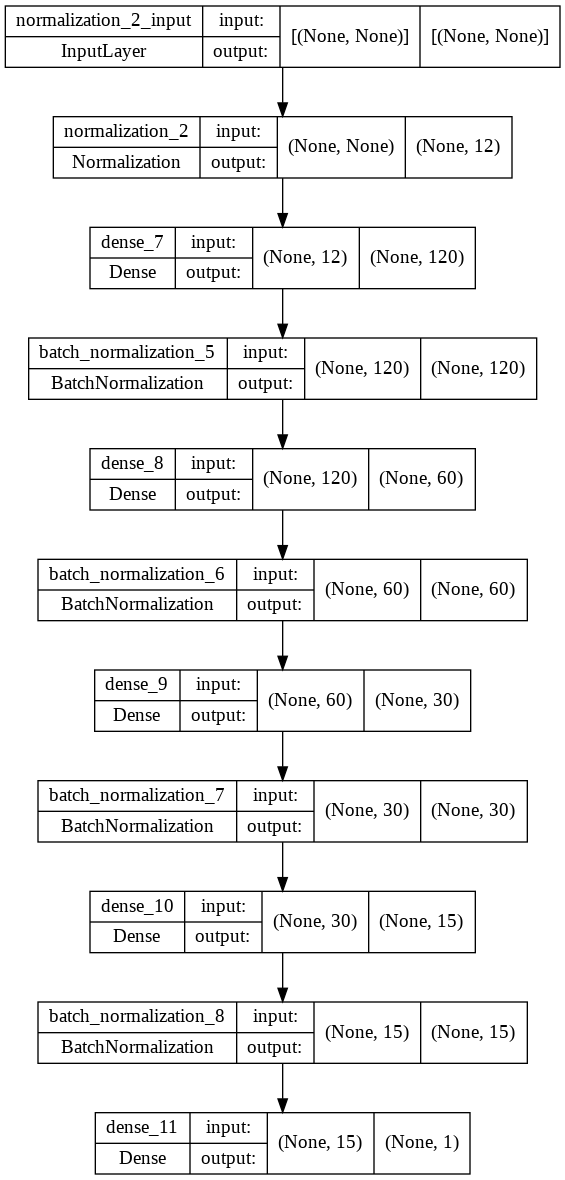

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size = 64, epochs=100, verbose=1, validation_split = 0.2, callbacks=[es])

Epoch 1/100
12/12 [==============================] - 4s 50ms/step - loss: 4.3272 - val_loss: 1.6111
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 1.0974 - val_loss: 1.0909
Epoch 3/100
12/12 [==============================] - 0s 16ms/step - loss: 0.8687 - val_loss: 0.9255
Epoch 4/100
12/12 [==============================] - 0s 15ms/step - loss: 0.7834 - val_loss: 0.9241
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7104 - val_loss: 0.9745
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 0.7040 - val_loss: 0.9367
Epoch 7/100
12/12 [==============================] - 0s 23ms/step - loss: 0.6378 - val_loss: 0.9166
Epoch 8/100
12/12 [==============================] - 0s 20ms/step - loss: 0.6022 - val_loss: 0.9957
Epoch 9/100
12/12 [==============================] - 0s 15ms/step - loss: 0.5782 - val_loss: 0.9296
Epoch 10/100
12/12 [==============================] - 0s 23ms/step - loss: 0.5323 - val_loss: 0.9382

In [ ]:
fig = px.line(history.history, log_y=True)
fig.update_layout(title='График ошибки модели', xaxis_title='Эпоха', yaxis_title='MSE')
fig.show()

In [ ]:
df = pd.DataFrame()
df["Предсказанное значение"] = model.predict(np.array((x_test))).reshape(-1, )
df["Оригинальное значение"] = y_test.values


In [ ]:
fig = px.line(df)
fig.show()

График оригинальные и предсказанные значения нейронной сети показывают близкое значение к усредненному значению по выборке.

In [ ]:
fig = px.scatter(df, x="Предсказанное значение", y="Оригинальное значение", trendline="ols")
fig.show()

По диаграмме рассеяния видно, что корреляция между оригинальными значениями и предсказанными отсутствует.

### Демонстрация более простой модели

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

model = Sequential([
    normalizer,
    Dense(12, activation='relu'),
    BatchNormalization(),
    Dense(1)
    ])

In [ ]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_9 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 242
Trainable params: 193
Non-trainable params: 49
_________________________________________________________________


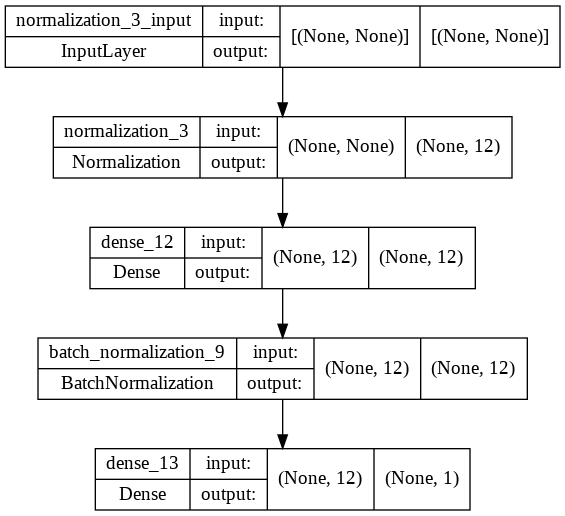

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size = 64, epochs=100, verbose=1, validation_split = 0.2, callbacks=[es])

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 4.6449 - val_loss: 1.1100
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0856 - val_loss: 1.0388
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8554 - val_loss: 0.9771
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8028 - val_loss: 0.9924
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8103 - val_loss: 0.9534
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8083 - val_loss: 0.9419
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8019 - val_loss: 0.9714
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8090 - val_loss: 0.9723
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7976 - val_loss: 0.9667
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7969 - val_loss: 0.9523
Epoch 10

In [ ]:
fig = px.line(history.history, log_y=True)
fig.update_layout(title='График ошибки модели', xaxis_title='Эпоха', yaxis_title='MSE')
fig.show()

In [ ]:
df = pd.DataFrame()
df["Предсказанное значение"] = model.predict(np.array((x_test))).reshape(-1, )
df["Оригинальное значение"] = y_test.values

In [ ]:
fig = px.line(df)
fig.show()

In [ ]:
fig = px.scatter(df, x="Предсказанное значение", y="Оригинальное значение", trendline="ols")
fig.show()

По диаграмме рассеяния видно, что корреляция между оригинальными значениями и предсказанными отсутствует.

Нейронная сеть с 2 слоями показала эффективность не хуже, чем нейронная сеть с большим количеством слоев. 

Сохраним нейронную сеть для последующей загрузки с помощью keras.models.load_model() 

In [ ]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets
